<a href="https://colab.research.google.com/github/JoseOrtega51/oscillator_GreenFunction/blob/main/Forced_damped_oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: José Ortega Moya

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [16]:
def Green(m,w,gamma,t):
  return np.where(t<0,0,1/(m*w)*np.exp(-gamma*t)*np.sin(w*t))

Datos:


In [17]:
m=1.0
k=1.0
lamb=0.1
t0=0
tf=150
Ndivisiones=1500
AmpF=1
TF=30

Magnitudes derivadas

In [18]:
gamma=lamb/(2*m)
w0=math.sqrt(k/m)
w=math.sqrt(w0*w0+gamma*gamma)

Definicion tiempos


In [19]:
t=np.linspace(t0,tf,Ndivisiones)


Green's function:

In [20]:
G=Green(m,w,gamma,t)

Text(0.5, 1.0, 'Función de Green')

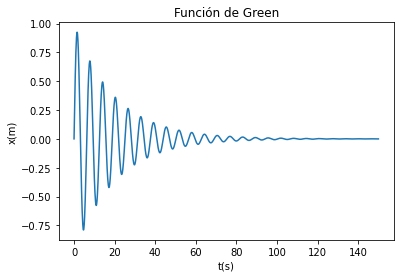

In [21]:
plt.plot(t,G)
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.title("Función de Green")
#plt.savefig("G6.eps")

Force definition (uncomment the desired term)


In [22]:
def fuerza(Amp, T, t):
 #return np.where(t%T<=T/2,Amp,-Amp)
 return np.cos((2*math.pi/T)*t)*Amp
 #return Amp*(t%(T))/T
 #return np.cos((2*math.pi/T*5)*t)*Amp*(t%(T))/T
 #return 0.1*Amp*np.cos((2*math.pi/T*5)*t)+Amp*(t%(T))/T
 #return Amp*(t-tf/2)*(t-tf/2)*0.001
 #return Amp*np.log10(t+1)
 #return np.where(t<tf/3, 0, Amp)

In [23]:
F=fuerza(AmpF,TF,t)


Plot forcing term over time:

Text(0.5, 1.0, 'Fuerza')

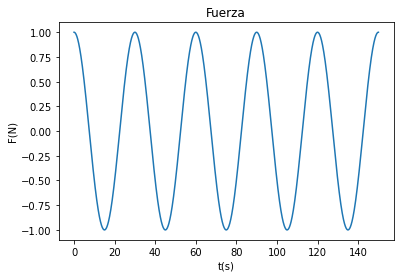

In [24]:
plt.plot(t,F)
plt.xlabel("t(s)")
plt.ylabel("F(N)")
plt.title("Fuerza")
#plt.savefig("F6.eps")

Solve using the Green's function:


Text(0.5, 1.0, 'Posición')

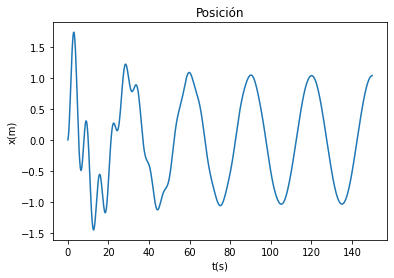

In [25]:
x=np.zeros(Ndivisiones)
Deltat=t[1]-t[0]
Gaux=G
for f in F:
  x=x+Gaux*Deltat*f
  Gaux=np.roll(Gaux,1)
  Gaux[0]=0
plt.plot(t,x)
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.title("Posición")
#plt.savefig("x6.eps")


Velocity vs time:

Text(0.5, 1.0, 'velocidad')

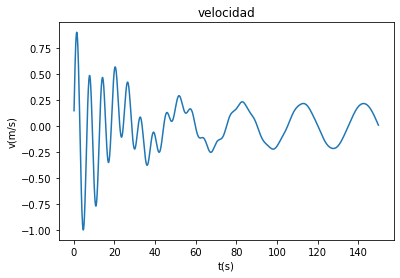

In [26]:
v=np.zeros(Ndivisiones-2)
for i in range(Ndivisiones-2):
  v[i]=(x[i+2]-x[i])/(2*Deltat)
plt.plot(t[1:Ndivisiones-1],v)
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.title("velocidad")
#plt.savefig("v6.eps")

Phase diagram:

Text(0.5, 1.0, 'Diagrama de fases')

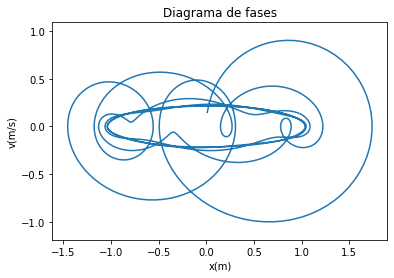

In [27]:
plt.plot(x[1:Ndivisiones-1],v)
plt.axis('equal')
plt.ylabel("v(m/s)")
plt.xlabel("x(m)")
plt.title("Diagrama de fases")
#plt.savefig("Fases6.eps")


Exact vs numerical solution (only for cosine forcing term):

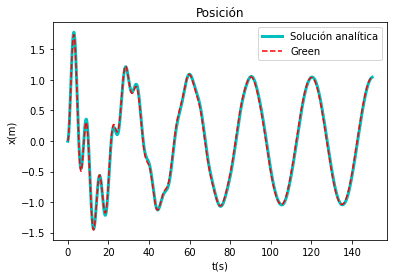

In [28]:
a1=AmpF/m/(np.sqrt(math.pow(w0*w0-math.pow((2*math.pi/TF),2),2)+4*gamma*gamma*pow((2*math.pi/TF),2)))
theta1=math.atan(2*gamma*2*math.pi/TF/(w0*w0-pow((2*math.pi/TF),2)))
theta=-math.atan(np.tan(-theta1)-gamma/w)
a=-a1*np.cos(-theta1)/np.cos(-theta)
xaux=a1*np.cos(2*math.pi/TF*t-theta)+a*np.exp(-gamma*t)*np.cos(w*t-theta1)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(t,xaux, c='c', label='Solución analítica',linewidth=3.0)
ax.plot(t,x, 'r--', label='Green')
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.title("Posición")
leg = plt.legend()
#plt.savefig("x5.eps")
